<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving train_data to train_data


In [3]:
train_data = pd.read_csv("/content/train_data")
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4


In [4]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [5]:
train_data["cluster_category"] = train_data["cluster_category"].astype(str)

In [6]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,object


In [7]:
!pip install category-encoders

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols = ["outlet_city"])
train_data = encoder.fit_transform(train_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [8]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [9]:
print(x)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0                   0              0              0              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              0              0              1   
4                   0              0              0              0   
...               ...            ...            ...            ...   
774142              0              1              1              1   
774143              1              0              0              0   
774144              0              1              1              0   
774145              1              0              1              0   
774146              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
0                   1       1209.60       756.00    5292.00  
1                   0       1590.12

In [10]:
print(y)

0         4
1         1
2         4
3         4
4         4
         ..
774142    3
774143    3
774144    3
774145    3
774146    3
Name: cluster_category, Length: 774147, dtype: object


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [12]:
print(x_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
89392               0              0              1              0   
585858              0              1              1              1   
200465              0              1              0              1   
70065               0              1              0              0   
773140              1              0              0              1   
...               ...            ...            ...            ...   
259178              0              0              0              0   
365838              0              0              0              1   
131932              0              1              0              1   
671155              0              1              1              0   
121958              0              0              1              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
89392               0       1328.16       996.12    5561.67  
585858              1       3021.38

In [13]:
print(x_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
187811              0              0              0              1   
415558              1              0              1              0   
536530              1              0              0              0   
78769               0              1              0              0   
318706              0              0              1              0   
...               ...            ...            ...            ...   
82635               0              1              0              0   
475123              0              1              0              1   
106366              0              1              0              0   
616655              1              0              0              1   
743829              0              1              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
187811              1       1334.00      9204.60    2401.20  
415558              0        673.53

In [14]:
print(y_train)

89392     4
585858    6
200465    2
70065     4
773140    3
         ..
259178    2
365838    5
131932    4
671155    6
121958    4
Name: cluster_category, Length: 580610, dtype: object


In [15]:
print(y_test)

187811    2
415558    1
536530    1
78769     4
318706    2
         ..
82635     4
475123    1
106366    4
616655    6
743829    3
Name: cluster_category, Length: 193537, dtype: object


In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 15,
                                    min_samples_split = 15, min_samples_leaf = 4,
                                    max_features = "sqrt", bootstrap = True, class_weight = "balanced",
                                    oob_score = True, random_state = 42)

classifier.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, min_samples_split=15,
                       n_estimators=500, oob_score=True, random_state=42)

In [17]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category": y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
187811,2,2
415558,1,1
536530,1,1
78769,4,4
318706,2,2
679332,6,6
466887,1,1
505135,1,1
287606,2,2
599478,6,6


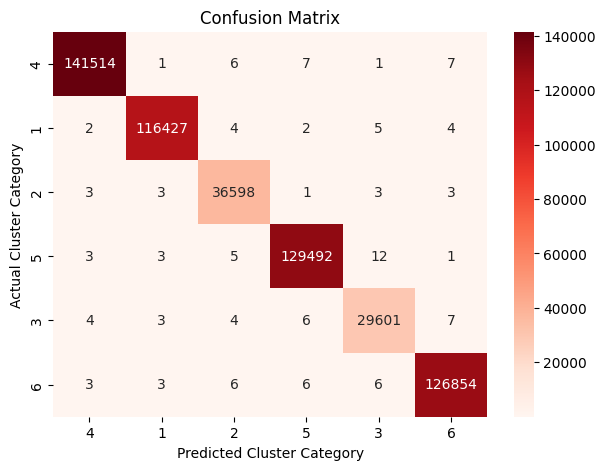

Random Forest Train Model Accuracy: 0.999786431511686


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"Random Forest Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

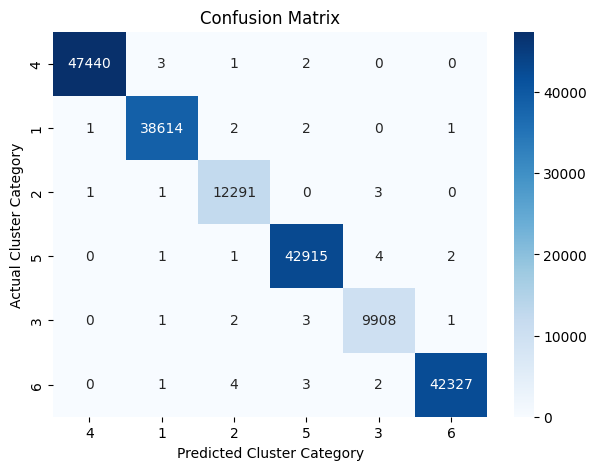

Random Forest Test Model Accuracy: 0.9997829872324155


In [19]:
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"Random Forest Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.98%
Standard Deviation: 0.01%
Total Error: 0.02%


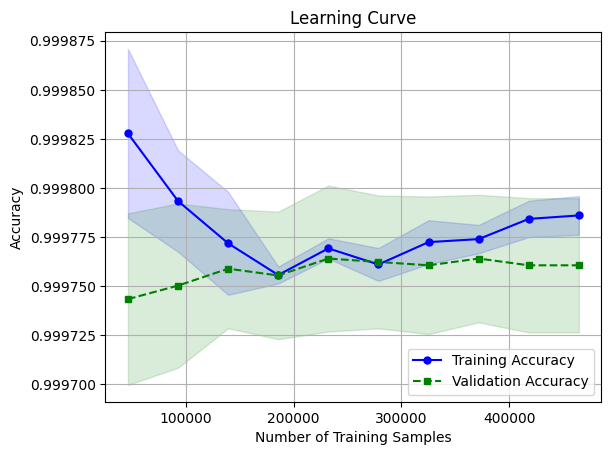

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                        X = x_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc = 'lower right')
plt.show()

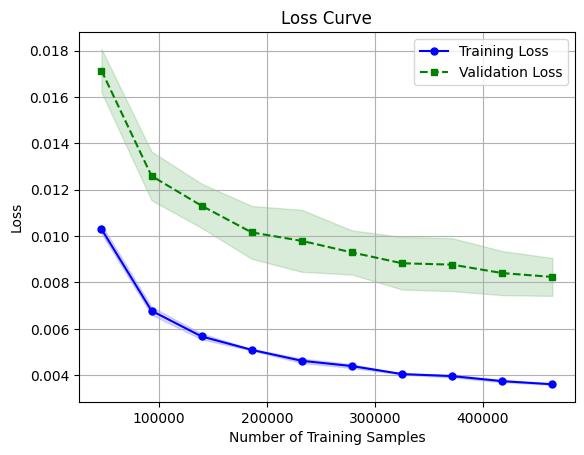

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_parameters = [{"criterion":["gini","entropy"],
                    "max_depth":[5,10,15,20,30],
                    "min_samples_split":[3,5,7,10],
                    "max_features":["sqrt","log2"],
                    "class_weight":[None, "balanced"],
                    "min_sample_leafs":[1,2,3,4]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper_parameters,
                           scoring = "accuracy",
                           cv = 10)

grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_hyper_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyper Parameters: {best_hyper_parameters}")

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     47446
           2       1.00      1.00      1.00     38620
           3       1.00      1.00      1.00     12296
           4       1.00      1.00      1.00     42923
           5       1.00      1.00      1.00      9915
           6       1.00      1.00      1.00     42337

    accuracy                           1.00    193537
   macro avg       1.00      1.00      1.00    193537
weighted avg       1.00      1.00      1.00    193537



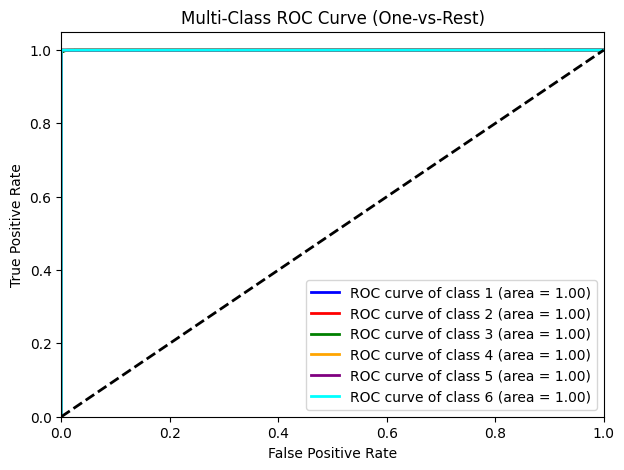

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

y_test_bin = label_binarize(y_test, classes=classifier.classes_)
n_classes = y_test_bin.shape[1]

classifier_ovr = OneVsRestClassifier(classifier)
classifier_ovr.fit(x_train, y_train)

y_score = classifier_ovr.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
             label = 'ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = "lower right")
plt.show()